In [40]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('./data/export.csv')

print(data)
print(data.info())
print(data.describe())

                               acctsessionid  \
0     e05d547b3aa2_000_0000002693_1733544787   
1     e05d547b39f3_000_0000003166_1733552003   
2     e05d547b39f3_000_0000007147_1733545649   
3     e05d547b39f3_000_0000002988_1733551508   
4     e05d547b39f3_000_0000001083_1733546903   
...                                      ...   
6809  e05d547b3aa2_000_0000001992_1733543587   
6810  e05d547b39f3_000_0000005643_1733544737   
6811  e05d547b39f3_000_0000007378_1733546159   
6812  e05d547b39f3_000_0000007151_1733545659   
6813  e05d547b3a75_000_0000000663_1733543496   

                          acctuniqueid  \
0     01d7bf04da530012afb8cf830929dfc4   
1     3016aa0844464d3e2dcb27a010f0daa2   
2     f37c544f252c24d6795d51b17ca0d061   
3     9b721fde20d1b0464ea5968b14a15531   
4     8b97a0ad42646c8e0eef257570f95357   
...                                ...   
6809  24553c583135a19860e439f331c7aadd   
6810  864988d5459d62ff53ba1e8574242758   
6811  6de78685adfc88ed970040cfba9143f2   
681

In [21]:
# Trích xuất thêm ngày tháng và giờ (Tokyo Time) từ cột `acctstarttime_tokyo`
data['start_date_tokyo'] = data['acctstarttime_tokyo'].dt.date  # Lấy ngày tháng
data['start_hour_tokyo'] = data['acctstarttime_tokyo'].dt.hour  # Lấy giờ

# Nhóm dữ liệu theo ngày, giờ và tính toán số lượng unique connections và access points
daily_hourly_summary = data.groupby(['start_date_tokyo', 'start_hour_tokyo']).agg(
    unique_connections=('acctuniqueid', 'nunique'),  # Đếm số kết nối duy nhất
    access_points=('nasidentifier', 'nunique')      # Đếm số AP duy nhất
).reset_index()

# Đổi tên cột cho rõ ràng
daily_hourly_summary.columns = ['Date (Tokyo Time)', 'Hour (Tokyo Time)', 'Unique Connections', 'Access Points']

# Hiển thị kết quả
daily_hourly_summary.head()

,Date (Tokyo Time),Hour (Tokyo Time),Unique Connections,Access Points
0,2024-12-06,12,27,1
1,2024-12-06,13,8,1
2,2024-12-06,14,2,1
3,2024-12-06,16,5,1
4,2024-12-06,17,7,1


In [23]:
# Trích xuất lại và giữ nguyên thông tin chi tiết của AP (nasidentifier)
daily_hourly_summary_detailed = data.groupby(['start_date_tokyo', 'start_hour_tokyo', 'nasidentifier']).agg(
    unique_connections=('acctuniqueid', 'nunique')  # Đếm số kết nối duy nhất
).reset_index()

# Đổi tên cột để rõ ràng hơn
daily_hourly_summary_detailed.columns = ['Date (Tokyo Time)', 'Hour (Tokyo Time)', 'Access Point (AP)', 'Unique Connections']

# Kiểm tra dữ liệu đầu ra
daily_hourly_summary_detailed.head()


,Date (Tokyo Time),Hour (Tokyo Time),Access Point (AP),Unique Connections
0,2024-12-06,12,jphub1.nghsig.jp,27
1,2024-12-06,13,jphub1.nghsig.jp,8
2,2024-12-06,14,jphub1.nghsig.jp,2
3,2024-12-06,16,jphub1.nghsig.jp,5
4,2024-12-06,17,jphub1.nghsig.jp,7


In [29]:
# Lọc dữ liệu theo ngày 7-8 tháng 12 và từ 9 giờ sáng trở đi (giờ Tokyo)
filtered_data = data[
    (data['start_date_tokyo'] >= datetime(2024, 12, 7).date()) &
    (data['start_date_tokyo'] <= datetime(2024, 12, 8).date()) &
    (data['start_hour_tokyo'] >= 9)
]

# Giữ lại các cột cần thiết cho phân tích
filtered_data = filtered_data[['start_date_tokyo', 'start_hour_tokyo', 'acctuniqueid', 'nasidentifier', 'acctsessiontime']]

# Đổi tên cột để rõ ràng hơn
filtered_data.columns = ['Date (Tokyo Time)', 'Hour (Tokyo Time)', 'Unique Connection ID', 'Access Point (AP)', 'Session Time (seconds)']

# Kiểm tra kết quả
filtered_data.head(), len(filtered_data)


(  Date (Tokyo Time)  Hour (Tokyo Time)              Unique Connection ID  \
 0        2024-12-07                 13  01d7bf04da530012afb8cf830929dfc4   
 1        2024-12-07                 15  3016aa0844464d3e2dcb27a010f0daa2   
 2        2024-12-07                 13  f37c544f252c24d6795d51b17ca0d061   
 3        2024-12-07                 15  9b721fde20d1b0464ea5968b14a15531   
 4        2024-12-07                 13  8b97a0ad42646c8e0eef257570f95357   
 
   Access Point (AP)  Session Time (seconds)  
 0  jphub1.nghsig.jp                    1167  
 1  jphub1.nghsig.jp                     363  
 2  jphub1.nghsig.jp                     351  
 3  jphub1.nghsig.jp                    2568  
 4  jphub1.nghsig.jp                      81  ,
 6765)

In [32]:
# Lọc dữ liệu cho ngày 7 và 8 tháng 12 theo múi giờ Tokyo (GMT+9)
filtered_data_by_date = data[
    (data['start_date_tokyo'] == datetime(2024, 12, 7).date()) |
    (data['start_date_tokyo'] == datetime(2024, 12, 8).date())
]

# Chọn các cột cần thiết
result_data = filtered_data_by_date[['acctuniqueid', 'nasidentifier', 'acctstarttime_tokyo']]

# Đổi tên cột cho rõ ràng hơn
result_data.columns = ['Unique Connection ID', 'Access Point (AP)', 'Start Time (Tokyo Time)']

# Kiểm tra kết quả
result_data.head(), len(result_data)


(               Unique Connection ID Access Point (AP)  \
 0  01d7bf04da530012afb8cf830929dfc4  jphub1.nghsig.jp   
 1  3016aa0844464d3e2dcb27a010f0daa2  jphub1.nghsig.jp   
 2  f37c544f252c24d6795d51b17ca0d061  jphub1.nghsig.jp   
 3  9b721fde20d1b0464ea5968b14a15531  jphub1.nghsig.jp   
 4  8b97a0ad42646c8e0eef257570f95357  jphub1.nghsig.jp   
 
     Start Time (Tokyo Time)  
 0 2024-12-07 13:13:00+09:00  
 1 2024-12-07 15:13:00+09:00  
 2 2024-12-07 13:27:00+09:00  
 3 2024-12-07 15:05:00+09:00  
 4 2024-12-07 13:48:00+09:00  ,
 6765)

In [36]:
# Chuyển đổi cột thời gian và thiết lập múi giờ Tokyo (GMT+9)
data['acctstarttime'] = pd.to_datetime(data['acctstarttime'], errors='coerce')
data['acctstarttime_tokyo'] = data['acctstarttime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Tokyo')

# Trích xuất thêm ngày và giờ (Tokyo Time)
data['start_date_tokyo'] = data['acctstarttime_tokyo'].dt.date
data['start_hour_tokyo'] = data['acctstarttime_tokyo'].dt.hour

# Lọc dữ liệu cho ngày 7 và 8 tháng 12
filtered_data = data[
    (data['start_date_tokyo'] == datetime(2024, 12, 7).date()) |
    (data['start_date_tokyo'] == datetime(2024, 12, 8).date())
]

# Nhóm dữ liệu theo ngày, giờ và AP, đếm số unique connections
hourly_ap_summary = filtered_data.groupby(['start_date_tokyo', 'start_hour_tokyo', 'nasidentifier']).agg(
    unique_connections=('acctuniqueid', 'nunique')
).reset_index()

# Đổi tên cột
hourly_ap_summary.columns = ['Date (Tokyo Time)', 'Hour (Tokyo Time)', 'Access Point (AP)', 'Unique Connections']

# Lưu kết quả ra file CSV
output_path = 'hourly_ap_connections_tokyo.csv'
hourly_ap_summary.to_csv(output_path, index=False)

print(f"Kết quả đã được lưu tại: {output_path}")

Kết quả đã được lưu tại: hourly_ap_connections_tokyo.csv


In [37]:
# Chuyển đổi cột thời gian và thiết lập múi giờ Tokyo (GMT+9)
data['acctstarttime'] = pd.to_datetime(data['acctstarttime'], errors='coerce')
data['acctstarttime_tokyo'] = data['acctstarttime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Tokyo')

# Trích xuất thêm ngày và giờ (Tokyo Time)
data['start_date_tokyo'] = data['acctstarttime_tokyo'].dt.date
data['start_hour_tokyo'] = data['acctstarttime_tokyo'].dt.hour

# Lọc dữ liệu cho ngày 7 và 8 tháng 12
filtered_data = data[
    (data['start_date_tokyo'] == datetime(2024, 12, 7).date()) |
    (data['start_date_tokyo'] == datetime(2024, 12, 8).date())
]

# Nhóm dữ liệu theo ngày, giờ, AP và IP address, đếm số unique connections
hourly_ap_ip_summary = filtered_data.groupby(['start_date_tokyo', 'start_hour_tokyo', 'nasidentifier', 'nasipaddress']).agg(
    unique_connections=('acctuniqueid', 'nunique')
).reset_index()

# Đổi tên cột
hourly_ap_ip_summary.columns = ['Date (Tokyo Time)', 'Hour (Tokyo Time)', 'Access Point (AP)', 'AP IP Address', 'Unique Connections']

# Lưu kết quả ra file CSV
output_path = 'hourly_ap_ip_connections_tokyo.csv'
hourly_ap_ip_summary.to_csv(output_path, index=False)

print(f"Kết quả đã được lưu tại: {output_path}")

Kết quả đã được lưu tại: hourly_ap_ip_connections_tokyo.csv


In [41]:
# Chuyển đổi cột thời gian và thiết lập múi giờ Tokyo (GMT+9)
data['acctstarttime'] = pd.to_datetime(data['acctstarttime'], errors='coerce')
data['acctstarttime_tokyo'] = data['acctstarttime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Tokyo')

# Trích xuất thêm ngày và giờ (Tokyo Time)
data['start_date_tokyo'] = data['acctstarttime_tokyo'].dt.date
data['start_hour_tokyo'] = data['acctstarttime_tokyo'].dt.hour

# Lọc dữ liệu cho ngày 7 và 8 tháng 12
filtered_data = data[
    (data['start_date_tokyo'] == datetime(2024, 12, 7).date()) |
    (data['start_date_tokyo'] == datetime(2024, 12, 8).date())
]

# Nhóm dữ liệu theo ngày, giờ, AP và IP address, đếm số unique connections
hourly_ap_ip_summary = filtered_data.groupby(['start_date_tokyo', 'start_hour_tokyo', 'nasidentifier', 'nasipaddress']).agg(
    unique_connections=('acctuniqueid', 'nunique')
).reset_index()

# Tính cumulative connections (cộng dồn theo thời gian)
hourly_ap_ip_summary['Cumulative Connections'] = hourly_ap_ip_summary.groupby(['start_date_tokyo', 'nasidentifier', 'nasipaddress'])['unique_connections'].cumsum()

# Đổi tên cột
hourly_ap_ip_summary.columns = ['Date (Tokyo Time)', 'Hour (Tokyo Time)', 'Access Point (AP)', 'AP IP Address', 'Unique Connections', 'Cumulative Connections']

# Lưu kết quả ra file CSV
output_path = 'hourly_ap_ip_cumulative_connections_tokyo.csv'
hourly_ap_ip_summary.to_csv(output_path, index=False)

print(f"Kết quả đã được lưu tại: {output_path}")

Kết quả đã được lưu tại: hourly_ap_ip_cumulative_connections_tokyo.csv


In [65]:
# Chuyển đổi thời gian bắt đầu và kết thúc thành datetime
df['acctstarttime'] = pd.to_datetime(df['acctstarttime'], format='%Y/%m/%d %H:%M')
df['acctstoptime'] = pd.to_datetime(df['acctstoptime'], format='%Y/%m/%d %H:%M')

# Điều chỉnh về múi giờ GMT+9 (Tokyo time)
df['acctstarttime'] = df['acctstarttime'] + pd.to_timedelta(9, unit='h')
df['acctstoptime'] = df['acctstoptime'] + pd.to_timedelta(9, unit='h')

# Lọc dữ liệu trong ngày 7/12
df_7_december = df[df['acctstarttime'].dt.date == pd.to_datetime('2024-12-07').date()]

# Tạo danh sách sự kiện (start và stop của các kết nối)
events = []
for _, row in df_7_december.iterrows():
    events.append((row['acctstarttime'], 1, row['nasipaddress']))  # Người dùng bắt đầu kết nối
    events.append((row['acctstoptime'], -1, row['nasipaddress']))  # Người dùng ngắt kết nối

# Sắp xếp các sự kiện theo thời gian
events.sort(key=lambda x: (x[0], x[1]))

# Dùng từ điển để lưu trữ số lượng người dùng đồng thời theo AP
current_connections = {}
max_concurrent_connections = {}

# Tính số lượng người dùng đồng thời tại mỗi thời điểm
for timestamp, change, nasipaddress in events:
    # Cập nhật số người dùng hiện tại cho AP này
    current_connections[nasipaddress] = current_connections.get(nasipaddress, 0) + change
    
    # Cập nhật số kết nối đồng thời tối đa cho mỗi AP
    max_concurrent_connections[nasipaddress] = max(
        max_concurrent_connections.get(nasipaddress, 0),
        current_connections[nasipaddress]
    )

# Chuyển kết quả thành dataframe
max_concurrent_df = pd.DataFrame(list(max_concurrent_connections.items()), columns=['nasipaddress', 'max_concurrent_connections'])

# In kết quả
print("\nSố lượng người đăng nhập đồng thời vào từng AP trong ngày 7/12:")
print(max_concurrent_df)


Số lượng người đăng nhập đồng thời vào từng AP trong ngày 7/12:
    nasipaddress  max_concurrent_connections
0  172.23.10.102                           4
1  172.23.10.101                          12
2  172.23.10.103                          18


In [66]:
# Chuyển đổi thời gian bắt đầu và kết thúc thành datetime
df['acctstarttime'] = pd.to_datetime(df['acctstarttime'], format='%Y/%m/%d %H:%M')
df['acctstoptime'] = pd.to_datetime(df['acctstoptime'], format='%Y/%m/%d %H:%M')

# Điều chỉnh về múi giờ GMT+9 (Tokyo time)
df['acctstarttime'] = df['acctstarttime'] + pd.to_timedelta(9, unit='h')
df['acctstoptime'] = df['acctstoptime'] + pd.to_timedelta(9, unit='h')

# Lọc dữ liệu trong ngày 8/12
df_8_december = df[df['acctstarttime'].dt.date == pd.to_datetime('2024-12-08').date()]

# Tạo danh sách sự kiện (start và stop của các kết nối)
events = []
for _, row in df_8_december.iterrows():
    events.append((row['acctstarttime'], 1, row['nasipaddress']))  # Người dùng bắt đầu kết nối
    events.append((row['acctstoptime'], -1, row['nasipaddress']))  # Người dùng ngắt kết nối

# Sắp xếp các sự kiện theo thời gian
events.sort(key=lambda x: (x[0], x[1]))

# Dùng từ điển để lưu trữ số lượng người dùng đồng thời theo AP
current_connections = {}
max_concurrent_connections = {}

# Tính số lượng người dùng đồng thời tại mỗi thời điểm
for timestamp, change, nasipaddress in events:
    # Cập nhật số người dùng hiện tại cho AP này
    current_connections[nasipaddress] = current_connections.get(nasipaddress, 0) + change
    
    # Cập nhật số kết nối đồng thời tối đa cho mỗi AP
    max_concurrent_connections[nasipaddress] = max(
        max_concurrent_connections.get(nasipaddress, 0),
        current_connections[nasipaddress]
    )

# Chuyển kết quả thành dataframe
max_concurrent_df = pd.DataFrame(list(max_concurrent_connections.items()), columns=['nasipaddress', 'max_concurrent_connections'])

# In kết quả
print("\nSố lượng người đăng nhập đồng thời vào từng AP trong ngày 8/12:")
print(max_concurrent_df)


Số lượng người đăng nhập đồng thời vào từng AP trong ngày 8/12:
    nasipaddress  max_concurrent_connections
0  172.23.10.102                           3
1  172.23.10.101                           6
2  172.23.10.103                          15


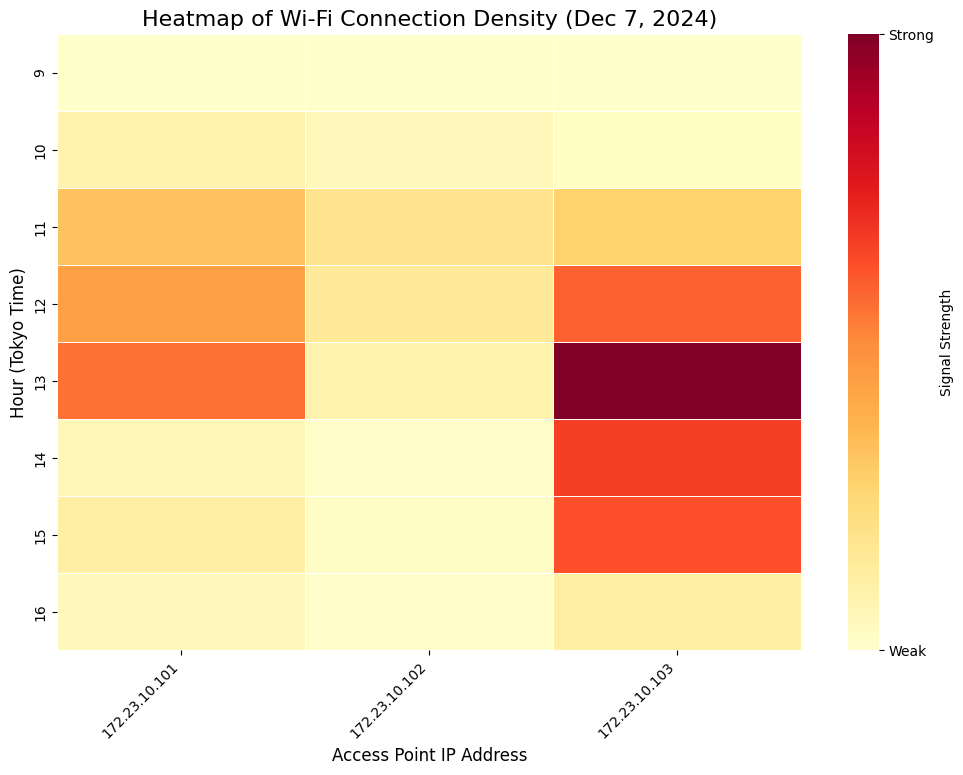

In [56]:
# Chuyển đổi cột thời gian và thiết lập múi giờ Tokyo (GMT+9)
data['acctstarttime'] = pd.to_datetime(data['acctstarttime'], errors='coerce')
data['acctstarttime_tokyo'] = data['acctstarttime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Tokyo')

# Trích xuất thêm ngày và giờ (Tokyo Time)
data['start_date_tokyo'] = data['acctstarttime_tokyo'].dt.date
data['start_hour_tokyo'] = data['acctstarttime_tokyo'].dt.hour

# Lọc dữ liệu cho ngày 7 tháng 12
filtered_data = data[data['start_date_tokyo'] == datetime(2024, 12, 7).date()]

# Nhóm dữ liệu theo giờ và địa chỉ AP, tính tổng số kết nối unique
hourly_ap_summary = filtered_data.groupby(['start_hour_tokyo', 'nasipaddress']).agg(
    unique_connections=('acctuniqueid', 'nunique')
).reset_index()

# Pivot dữ liệu để có thể tạo bản đồ nhiệt, giữ chỉ giờ và số kết nối unique
pivot_data = hourly_ap_summary.pivot(index='start_hour_tokyo', columns='nasipaddress', values='unique_connections')

# Thay thế giá trị NaN bằng 0 (nếu có)
pivot_data = pivot_data.fillna(0)

# Tạo một color palette nóng để phân biệt sóng mạnh và yếu
cmap = "YlOrRd"  # Gradient màu nóng từ vàng (yếu) đến đỏ (mạnh)

# Vẽ bản đồ nhiệt
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data, cmap=cmap, annot=False, linewidths=0.5)

# Thêm tiêu đề và nhãn
plt.title('Heatmap of Wi-Fi Connection Density (Dec 7, 2024)', fontsize=16)
plt.xlabel('Access Point IP Address', fontsize=12)
plt.ylabel('Hour (Tokyo Time)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Tạo colorbar và thêm label "Weak" và "Strong"
colorbar = ax.collections[0].colorbar
colorbar.set_label('Signal Strength')
colorbar.set_ticks([0, pivot_data.values.max()])
colorbar.set_ticklabels(['Weak', 'Strong'])

# Hiển thị bản đồ nhiệt
plt.show()

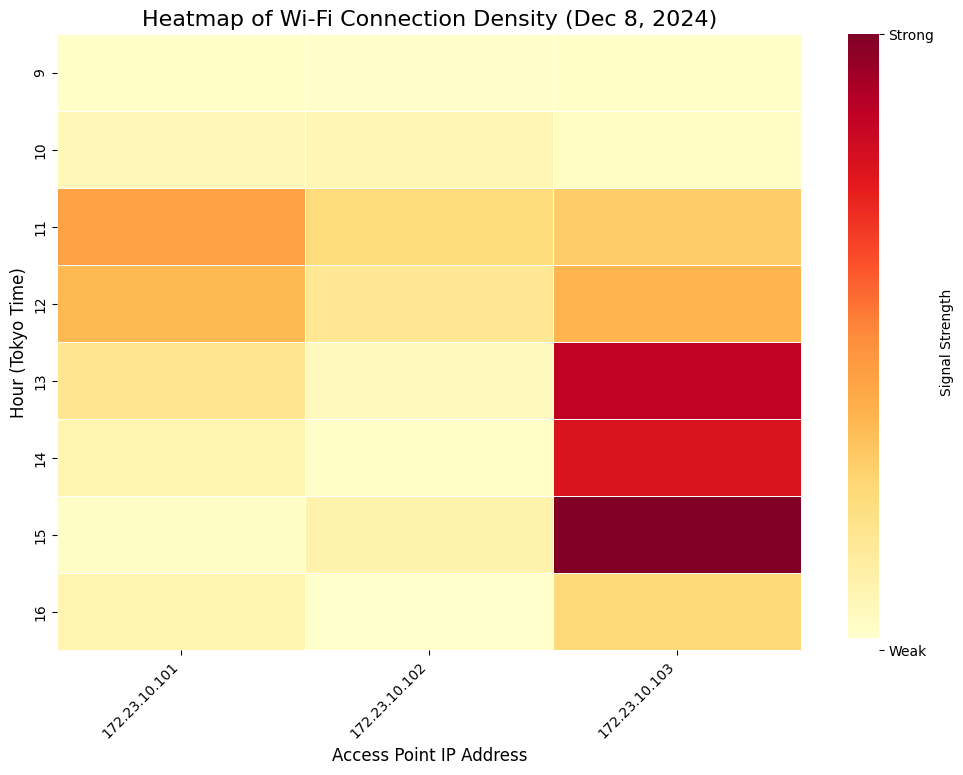

In [58]:
# Chuyển đổi cột thời gian và thiết lập múi giờ Tokyo (GMT+9)
data['acctstarttime'] = pd.to_datetime(data['acctstarttime'], errors='coerce')
data['acctstarttime_tokyo'] = data['acctstarttime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Tokyo')

# Trích xuất thêm ngày và giờ (Tokyo Time)
data['start_date_tokyo'] = data['acctstarttime_tokyo'].dt.date
data['start_hour_tokyo'] = data['acctstarttime_tokyo'].dt.hour

# Lọc dữ liệu cho ngày 8 tháng 12
filtered_data_8_dec = data[data['start_date_tokyo'] == datetime(2024, 12, 8).date()]

# Nhóm dữ liệu theo giờ và địa chỉ AP, tính tổng số kết nối unique
hourly_ap_summary_8_dec = filtered_data_8_dec.groupby(['start_hour_tokyo', 'nasipaddress']).agg(
    unique_connections=('acctuniqueid', 'nunique')
).reset_index()

# Pivot dữ liệu để có thể tạo bản đồ nhiệt, giữ chỉ giờ và số kết nối unique
pivot_data_8_dec = hourly_ap_summary_8_dec.pivot(index='start_hour_tokyo', columns='nasipaddress', values='unique_connections')

# Thay thế giá trị NaN bằng 0 (nếu có)
pivot_data_8_dec = pivot_data_8_dec.fillna(0)

# Tạo một color palette nóng để phân biệt sóng mạnh và yếu
cmap = "YlOrRd"  # Gradient màu nóng từ vàng (yếu) đến đỏ (mạnh)

# Vẽ bản đồ nhiệt
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data_8_dec, cmap=cmap, annot=False, linewidths=0.5)

# Thêm tiêu đề và nhãn
plt.title('Heatmap of Wi-Fi Connection Density (Dec 8, 2024)', fontsize=16)
plt.xlabel('Access Point IP Address', fontsize=12)
plt.ylabel('Hour (Tokyo Time)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Tạo colorbar và thêm label "Weak" và "Strong"
colorbar = ax.collections[0].colorbar
colorbar.set_label('Signal Strength')
colorbar.set_ticks([0, pivot_data_8_dec.values.max()])
colorbar.set_ticklabels(['Weak', 'Strong'])

# Hiển thị bản đồ nhiệt
plt.show()